In [17]:
import pandas as pd
import numpy as np
import os
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
pd.options.mode.chained_assignment = None

In [2]:
df=pd.read_csv("D://IITH/Project/python/data/rainfall_oscillations.csv",index_col=0)

y=df['Rainfall'].values

X=df.drop(['Rainfall'],axis=1).values

X.shape
df.head()

,AMO,AO,DMI,DMIEAST,DMIWEST,EA,EAWR,EPNP,NAO,NINO12,...,SCN,SFlux,SOI,TNA,TNI,TPI,TSA,WHWP,WPSST,Rainfall
1950-01-01,0.105,-0.060,-0.044,-0.705,-0.749,-2.71,2.29,0.91,0.92,23.63,...,0.78,1507.0,-99.99,-0.14,0.624,-1.435,0.08,-0.17,-1.69,0.000000
1950-02-01,-0.040,0.627,-0.554,-0.361,-0.915,0.66,-0.57,-1.13,0.40,22.68,...,-0.94,1433.0,-99.99,-0.36,0.445,-1.411,0.15,-0.30,-1.36,31.800001
1950-03-01,-0.112,-0.008,-0.692,-0.131,-0.823,0.82,-1.80,-0.02,-0.36,21.33,...,-0.22,1378.0,-99.99,-0.37,0.382,-1.074,0.12,-0.96,-0.38,7.000000
1950-04-01,-0.137,0.555,-0.475,-0.507,-0.982,0.28,-2.50,-1.87,0.73,20.31,...,0.46,1643.0,-99.99,-0.11,0.311,-1.234,-0.17,-1.93,-0.50,0.000000
1950-05-01,-0.065,0.072,-0.309,-0.569,-0.878,-0.51,1.41,-0.98,-0.59,20.12,...,0.28,1571.0,-99.99,-0.25,0.124,-1.603,-0.34,-2.27,0.23,8.500000


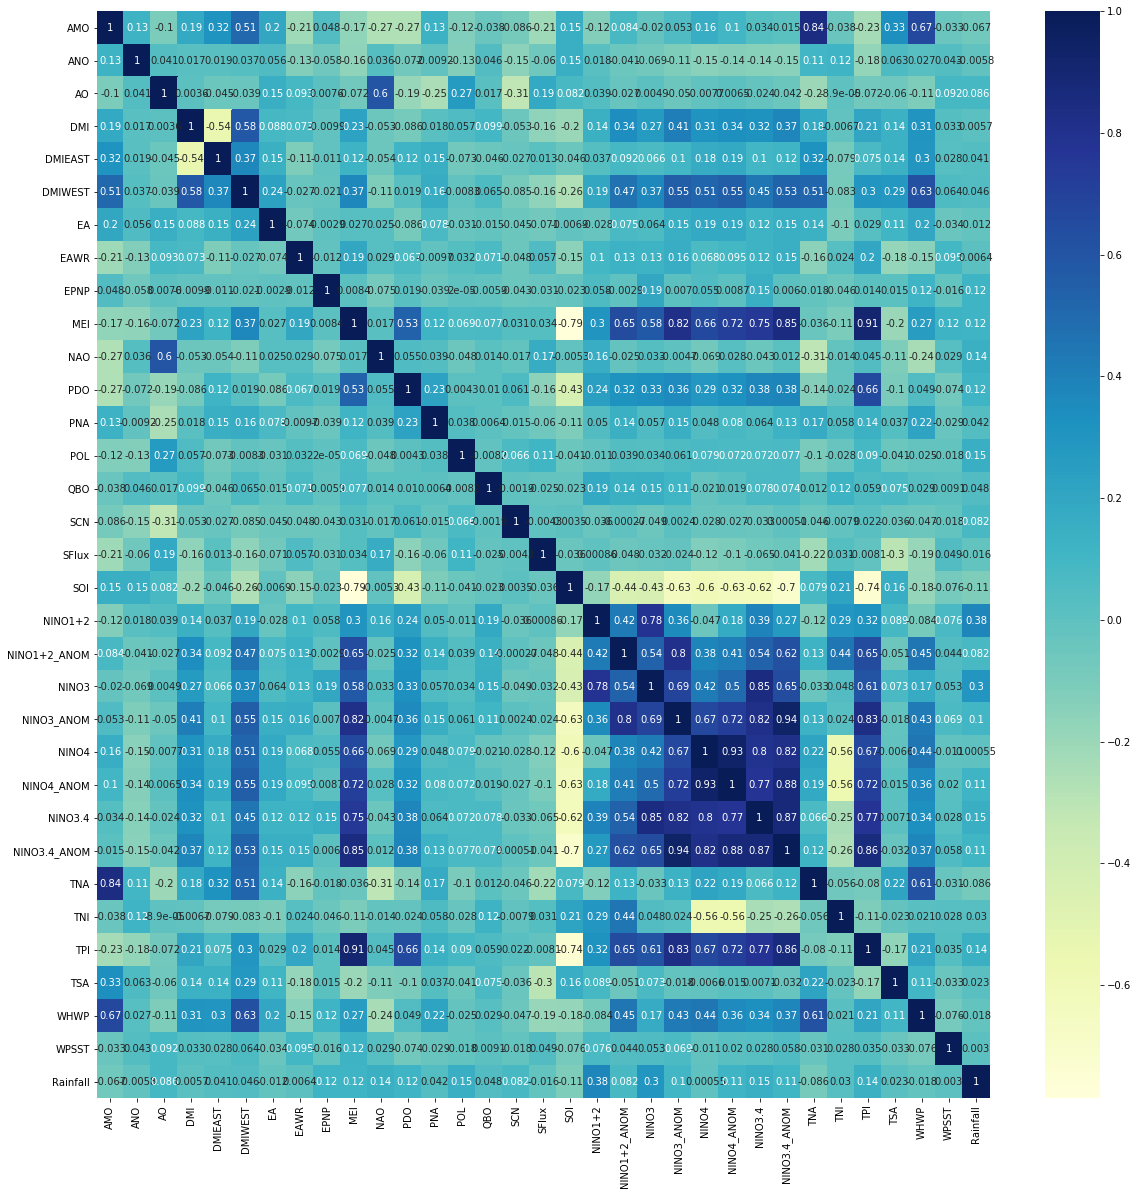

<Figure size 432x288 with 0 Axes>

In [3]:
plt.figure(figsize=(20,20))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()
plt.savefig("new.png")

In [8]:
df=df.drop([ 'NINO1+2_ANOM', 'NINO3', 'NINO3_ANOM', 'NINO4', 'NINO4_ANOM',
       'NINO3.4', 'NINO3.4_ANOM'],axis=1)

In [6]:
df.shape

(804, 26)

# Data Standardization

In [4]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

y_2d=y.reshape(-1, 1)
Y_std = StandardScaler().fit_transform(y_2d)

In [5]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00124533e+00 -1.19659981e-01  3.70789477e-02  2.79908525e-01
   2.97246421e-01  1.73821603e-01 -1.56929408e-01  1.83454484e-02
  -2.07234385e-01 -7.90454612e-02 -7.99827108e-02 -7.81741270e-02
  -9.65973443e-02  1.21640608e-01 -6.01693748e-02  7.17590798e-03
  -8.24880257e-02  1.53256825e-03 -1.94571160e-03  7.71231412e-01
  -1.09195242e-01 -5.30804758e-03  1.55538984e-01  6.01720807e-01
  -4.80976085e-02]
 [-1.19659981e-01  1.00124533e+00  1.89589450e-02  1.39404111e-02
   3.05356184e-02  1.43160601e-01  1.13240904e-01  1.79073322e-04
   6.05922292e-01 -1.65879303e-02 -3.26514792e-02 -3.12947090e-02
  -1.58043874e-01 -2.29204007e-01  2.46389052e-01  5.54776975e-02
  -2.42760996e-01  4.50748142e-02  2.40190554e-02 -2.09512887e-01
  -1.96914236e-03 -1.02860091e-01  2.33584197e-02 -6.55789636e-02
   1.29624387e-01]
 [ 3.70789477e-02  1.89589450e-02  1.00124533e+00 -4.20543845e-01
   5.20845147e-01  4.88041463e-02 -2.13175219e-02 -5.51051547e-02
   1.43659346e-02  

In [7]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 3.18017003e-01 -7.46088143e-03  3.55863492e-01 -1.61907189e-01
  -1.84365346e-01  2.45921729e-03  9.25016784e-05  7.56406486e-03
  -3.26985290e-01 -5.80810075e-01  2.13191855e-01 -4.34914032e-02
   2.93394356e-01 -2.40439039e-01  2.94205676e-02  8.08552341e-02
   1.69630684e-02  9.60078303e-02  1.36271695e-01  1.54232951e-01
   1.11021097e-02 -6.31585461e-02 -7.66747758e-02 -3.83301340e-02
  -7.53862645e-02]
 [-8.44178716e-02  4.69585842e-02 -4.29450378e-01 -4.26146611e-01
  -2.60180575e-01  6.59810112e-04  2.72349068e-05 -4.86457317e-02
   5.51294067e-01 -3.28402337e-01 -2.02668022e-01 -1.11433646e-01
   3.80843840e-02 -1.58253379e-01 -5.19529726e-02  4.47796901e-02
   5.06449288e-03  1.58053666e-01  9.49496870e-03  6.28060870e-02
   6.47186457e-02 -3.10919994e-02 -5.54614804e-02 -1.43294084e-01
  -1.75929389e-02]
 [ 1.06411591e-01 -6.71030020e-02 -6.07543593e-02 -3.62799111e-01
   5.76624711e-01  3.81483790e-03 -5.54691653e-01  1.18773028e-03
  -4.53981658e-02 -1.071

In [8]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
3.848949181275816
2.9584331997219837
1.955397228668244
1.803384959658359
1.621455690450794
1.2168908531093288
1.1638226355354568
1.0957076355142192
1.0034222378486586
0.9890333178850714
0.9493957269295038
0.9372714696403085
0.920035738417833
0.8525527312465602
0.8166570272347955
0.7624847502902595
0.7046430187372582
0.4503621781478413
0.3381560473933727
0.2260637200539984
0.17573173589677446
0.16724176252029263
0.07163906933463542
0.0024007485412662626
5.862587044040285e-07


#### After sorting the eigenpairs, the next question is "how many principal components are we going to choose for our new feature subspace?" A useful measure is the so-called "explained variance," which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [9]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

In [10]:
var_exp

[15.376647724201392,
 11.819014225754989,
 7.81186057025174,
 7.204567774157524,
 6.477755818069589,
 4.861509229088512,
 4.649500379775979,
 4.37737926028815,
 4.008696800957575,
 3.9512127077697126,
 3.7928595458924947,
 3.7444228364237198,
 3.675565661440397,
 3.405969369109392,
 3.2625651386544314,
 3.046145544691932,
 2.815066388288648,
 1.7992081047398831,
 1.3509418211784987,
 0.9031301850913468,
 0.7020526563438302,
 0.6681350015114177,
 0.2861998640582698,
 0.009591050142471684,
 2.3421181076439544e-06]

94.28073897481619

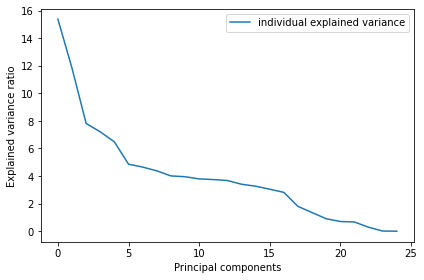

In [11]:
plt.figure(figsize=(6, 4))
plt.plot(var_exp,label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

sum(var_exp[:17]) 

# Prinicipal Component Analysis

Text(0, 0.5, 'Cumulative explained variance')

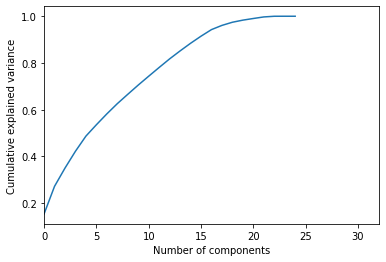

In [12]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,32,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [13]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=17)
X_pca = sklearn_pca.fit_transform(X_std)
cols=[]
for i in range(1,18):
    a=f'PCA_{i}'
    cols.append(a)

In [14]:
df_new=pd.DataFrame(X_pca,index=df.index,)

In [15]:
df.shape

(804, 26)

In [16]:
df_new.shape

(804, 17)

In [20]:
pca.explained_variance_ratio_

array([1.53766477e-01, 1.18190142e-01, 7.81186057e-02, 7.20456777e-02,
       6.47775582e-02, 4.86150923e-02, 4.64950038e-02, 4.37737926e-02,
       4.00869680e-02, 3.95121271e-02, 3.79285955e-02, 3.74442284e-02,
       3.67556566e-02, 3.40596937e-02, 3.26256514e-02, 3.04614554e-02,
       2.81506639e-02, 1.79920810e-02, 1.35094182e-02, 9.03130185e-03,
       7.02052656e-03, 6.68135002e-03, 2.86199864e-03, 9.59105014e-05,
       2.34211811e-08])